# Exercise: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed this year.
Use the data in `indices.csv` from the folder `../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and restrict the sample to the calendar year 2024. 

    *Hint:* You have to first figure out which character is used to separate individual columns.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  The data comes in a "long" format where each date-ticker combination is stored in 
    a separate row. For the following analysis, the data needs to be reshaped such that each 
    ticker symbol is in its own column ("wide" format).

    Use the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    method to reshape the `DataFrame` into the desired form. Consult the 
    [user guide](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table)
    to see a graphical illustration.

    Your pivoted `DataFrame` should look as follows:
    ```
        Ticker	DJIA	NASDAQ	SP500
    Date			
    2024-01-02	37715.0	14765.9	4742.8
    2024-01-03	37430.2	14592.2	4704.8
    ```
3.  Create a line plot which shows the time series for each of the three ticker symbols in a single graph,
    for example using [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).
4.  The graph you just created is not very satisfactory as the three
    indices are recorded on vastly different scales. Express each index
    relative to its initial value in 2024 (so that all three start with the value
    1.0) and recreate the previous graph with this normalized data.
5.  Another way to check whether the three indices are co-moving is to compute and plot their daily returns.
    For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent (e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)), 
    and plot the three time series of daily returns in a single graph.
6.  The previous plots suggests that the three indices co-move a lot. 
    
    1.  In order to quantify the strength of 
        this co-movement, compute the pairwise correlations of daily returns using 
        [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 3-by-3 subplots where each off-diagonal plot shows the 
        scatter plot for two of the indices.
    
        *Hint:* You can use the function [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to accomplish this task. Alternatively, you can create a figure with 3-by-3 subplots using Matplotlib's 
        [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), iterate over all rows and columns and add a [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot to each `axes` object.

    3.  Add the correlation coefficient for each stockmarket index pair 
        as text to the corresponding subplot in the figure you created
        (this can be done using [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)).

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = '/Users/olavgramstadberstad/Desktop/repos/TECH2-H24/data/stockmarket'

file = f'{DATA_PATH}/indices.csv'

dataframe = pd.read_csv(file, sep='\t', parse_dates=['Date'], index_col='Date')

df = dataframe.loc['2024':]


df = df.pivot(columns='Ticker', values='Price')
df

Ticker,DJIA,NASDAQ,SP500
Date,,,
2024-01-02,37715.0,14765.9,4742.8
2024-01-03,37430.2,14592.2,4704.8
2024-01-04,37440.3,14510.3,4688.7
2024-01-05,37466.1,14524.1,4697.2
2024-01-08,37683.0,14843.8,4763.5
...,...,...,...
2024-10-15,42740.4,18315.6,5815.3
2024-10-16,43077.7,18367.1,5842.5
2024-10-17,43239.1,18373.6,5841.5


<Axes: xlabel='Date'>

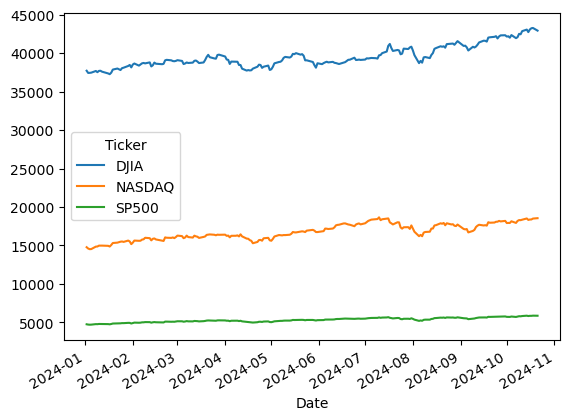

In [111]:
columns = list(df.columns)

df.plot(y=columns)

<Axes: xlabel='Date'>

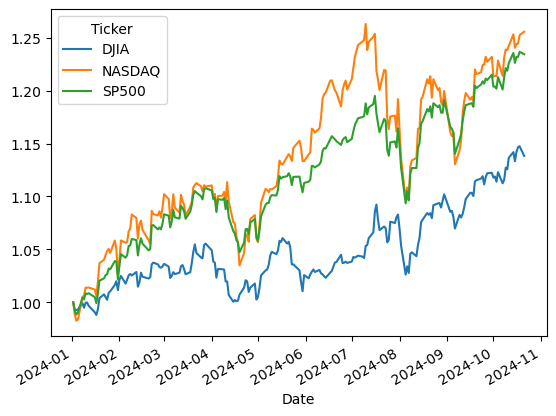

In [112]:
df_rel = df / df.loc['2024-01-02']
df_rel.plot()

<Axes: xlabel='Date'>

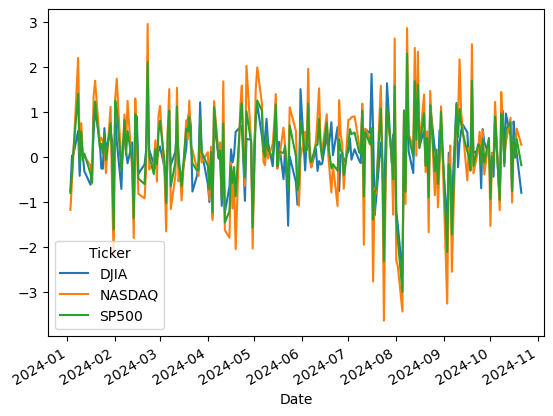

In [113]:
df_pct = df.pct_change()*100
df_pct.plot()

In [114]:
# Compute the correlation matrix
df_pct.corr()

Ticker,DJIA,NASDAQ,SP500
Ticker,,,
DJIA,1.000000,0.651024,0.808597
NASDAQ,0.651024,1.000000,0.959787
SP500,0.808597,0.959787,1.000000


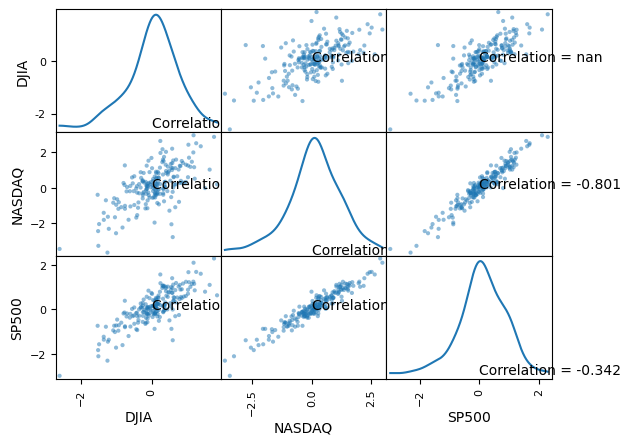

In [117]:
import pandas.plotting as pdplot

axes = pdplot.scatter_matrix(df_pct, diagonal='kde')

nrow, ncol = axes.shape
for i in range(nrow):
    for j in range(ncol):
        ax = axes[i, j]
        txt = f'Correlation = {df_pct.iloc[i,j]:.3f}'
        ax.text(0, 0, txt)

# Exercise: Long-run returns of the S&P 500

For this question, we restrict our attention to the S&P 500 and examine its long-run annual returns.
Use the data from `SP500.csv` from the folder `../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and set the `Date` column as the index.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  You are interested in computing annual returns, but the data you just loaded contains daily observations.
    For each calendar year, select the first observation to get an annualized time series.

    _Hint_: Use the [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method to aggregate by year. 
3.  Compute the annual returns of the S&P 500, defined as the relative change from the previous-year's price on the first trading day
    (e.g., using [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)).
    Plot the resulting annual return time series. 
4.  What are the mean and standard deviation of annual returns?
    Indicate the average annual returns over this period using a horizontal line in the plot you previously created.

# Exercise: Daily returns of Apple, Nvidia and Tesla

In this exercise, you are asked to compute various statistics of daily returns for selected stocks and plot these as bar charts. 
You'll be using data from files located in the folder `../data/stockmarket`.

1.  Load the price data for Apple Inc (`AAPL.csv`), Nvidia Inc (`NVDA.csv`) and Tesla Inc (`TSLA.csv`). Set the `Date` column as the index and merge these data sets
    into a single DataFrame, keeping only those dates for which you have observations on all three stocks. Restrict your data to the calendar years 2015-2023.

    *Hint:* All three time series have a `Price` column which you should rename to the respective ticker symbol (e.g., `AAPL`) before merging the data 
    to avoid overlapping column names.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  Compute the average daily returns for each of the three stocks, e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html). For simplicity, we assume 
    that daily returns are defined as the percentage change vs. the previous observation even though these may be multiple days apart.

    Compute the average daily returns, the standard deviation of daily returns, and the 
    [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) 
    of daily returns by calendar year (using 
    [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)).
    For this exercise, we define Sharpe ratio as the ratio of average returns divided by their standard deviation.

3.  Create three figures visualizing these statistics. Each figure should contain a bar chart that shows one of the statistics (mean, std. deviation, Sharpe ratio)
    for all three companies by calendar year. Properly label your figures (using labels for x-axis, y-axis and titles), and add a horizontal line 
    at zero for the figures depicting average returns and the Sharpe ratio.